In [14]:
#importing important libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/MoneyClassification/Train_Data'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/MoneyClassification/Valid_Data'

In [17]:
train_dataset = train.flow_from_directory(train_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (150,150), batch_size = 10, class_mode = 'categorical')

Found 78 images belonging to 11 classes.
Found 77 images belonging to 11 classes.


In [18]:
train_dataset.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200': 3,
 '200k': 4,
 '20k': 5,
 '2k': 6,
 '500': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

In [19]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(11,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [21]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [22]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
8/8 [==============================] - 22s 3s/step - loss: 2.8610 - accuracy: 0.0641 - val_loss: 2.4172 - val_accuracy: 0.1558
Epoch 2/50
8/8 [==============================] - 14s 2s/step - loss: 2.4384 - accuracy: 0.0641 - val_loss: 2.3958 - val_accuracy: 0.0909
Epoch 3/50
8/8 [==============================] - 11s 1s/step - loss: 2.4196 - accuracy: 0.0897 - val_loss: 2.3849 - val_accuracy: 0.1818
Epoch 4/50
8/8 [==============================] - 12s 1s/step - loss: 2.3978 - accuracy: 0.0769 - val_loss: 2.3771 - val_accuracy: 0.1688
Epoch 5/50
8/8 [==============================] - 12s 1s/step - loss: 2.3718 - accuracy: 0.1795 - val_loss: 2.3711 - val_accuracy: 0.1558
Epoch 6/50
8/8 [==============================] - 12s 2s/step - loss: 2.3714 - accuracy: 0.1410 - val_loss: 2.3669 - val_accuracy: 0.1818
Epoch 7/50
8/8 [==============================] - 11s 1s/step - loss: 2.3711 - accuracy: 0.1538 - val_loss: 2.3562 - val_accuracy: 0.1558
Epoch 8/50
8/8 [==================

In [41]:
model.save('/content/drive/MyDrive/MoneyClassification/MoneyClassification.h5')

In [42]:
moneyclassification_model = load_model('/content/drive/MyDrive/MoneyClassification/MoneyClassification.h5')

In [43]:
score=moneyclassification_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

8/8 [==============================] - 3s 332ms/step - loss: 0.1958 - accuracy: 0.9740
Test loss =  0.19582980871200562
Test accuracy =  0.9740259647369385


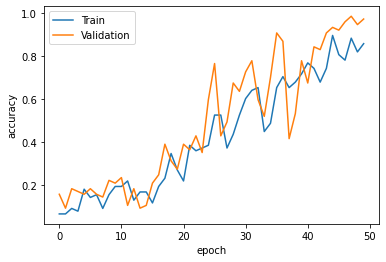

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Tờ tiền này có giá trị là:  10k


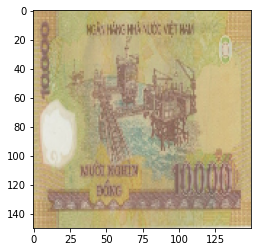

In [45]:
img = load_img('/content/drive/MyDrive/MoneyClassification/Pred_Data/10ngan.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100k','10k','1k','200k','20k','2k','500','500k','50k','5k']
print('Tờ tiền này có giá trị là: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

Tờ tiền này có giá trị là:  1k


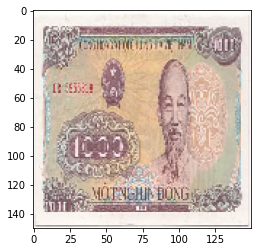

In [46]:
img = load_img('/content/drive/MyDrive/MoneyClassification/Pred_Data/7.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100k','10k','1k','200k','20k','2k','500','500k','50k','5k']
print('Tờ tiền này có giá trị là: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

Tờ tiền này có giá trị là:  200k


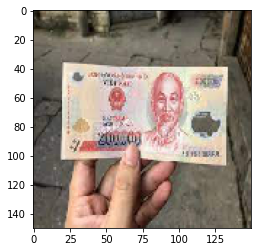

In [52]:
img = load_img('/content/drive/MyDrive/MoneyClassification/Pred_Data/images.jfif',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['100k','10k','1k','200k','20k','2k','500','500k','50k','5k']
print('Tờ tiền này có giá trị là: ',Label[int(np.argmax(moneyclassification_model.predict(img),axis=-1))])

In [53]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('MoneyClassification.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MoneyClassification.ipynb to pdf
[NbConvertApp] Support files will be in MoneyClassification_files/
[NbConvertApp] Making directory ./MoneyClassification_files
[NbConvertApp] Making directory ./MoneyClassification_files
[NbConvertApp] Making directory ./MoneyClassification_files
[NbConvertApp] Making directory ./MoneyClassification_files
[NbConvertApp] Writing 55214 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 352037 bytes to /content

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'